<a href="https://colab.research.google.com/github/Chirag314/Feature-Engineering/blob/main/Feature_Engineering_practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is about practicing feature engineering from book'Python Feature Engineering Cookbook'

Download titanic data.

In [1]:
import numpy as np
import pandas as pd

def get_first_cabin(row):
  try:
    return row.split()[0]
  except:
    return np.nan
url="https://www.openml.org/data/get_csv/16826755/phpMYEkMl"
data=pd.read_csv(url)
data=data.replace('?',np.nan)
data['cabin']=data['cabin'].apply(get_first_cabin)
data.to_csv('titanic.csv',index=False)

In [2]:
#Check all data types of Titanic data
import matplotlib.pyplot as plt
data=pd.read_csv('titanic.csv')
data.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [3]:
data['sibsp'].unique()

array([0, 1, 2, 3, 4, 5, 8])

In [4]:
#lets check first few values of variable 'fare'
data['fare'].unique()[0:20]

array([211.3375, 151.55  ,  26.55  ,  77.9583,   0.    ,  51.4792,
        49.5042, 227.525 ,  69.3   ,  78.85  ,  30.    ,  25.925 ,
       247.5208,  76.2917,  75.2417,  52.5542, 221.7792,  26.    ,
        91.0792, 135.6333])

In [5]:
#Also check 'embark' and 'cabin' variables
data['embarked'].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [6]:
data['cabin'].unique()

array(['B5', 'C22', 'E12', 'D7', 'A36', 'C101', nan, 'C62', 'B35', 'A23',
       'B58', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99', 'C52', 'T',
       'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4', 'E40',
       'B38', 'E24', 'B51', 'B96', 'C46', 'E31', 'E8', 'B61', 'B77', 'A9',
       'C89', 'A14', 'E58', 'E49', 'E52', 'E45', 'B22', 'B26', 'C85',
       'E17', 'B71', 'B20', 'A34', 'C86', 'A16', 'A20', 'A18', 'C54',
       'C45', 'D20', 'A29', 'C95', 'E25', 'C111', 'C23', 'E36', 'D34',
       'D40', 'B39', 'B41', 'B102', 'C123', 'E63', 'C130', 'B86', 'C92',
       'A5', 'C51', 'B42', 'C91', 'C125', 'D10', 'B82', 'E50', 'D33',
       'C83', 'B94', 'D49', 'D45', 'B69', 'B11', 'E46', 'C39', 'B18',
       'D11', 'C93', 'B28', 'C49', 'B52', 'E60', 'C132', 'B37', 'D21',
       'D19', 'C124', 'D17', 'B101', 'D28', 'D6', 'D9', 'B80', 'C106',
       'B79', 'C47', 'D30', 'C90', 'E38', 'C78', 'C30', 'C118', 'D36',
       'D48', 'D47', 'C105', 'B36', 'B30', 'D43', 'B24', 'C2', 'C65',


<Axes: >

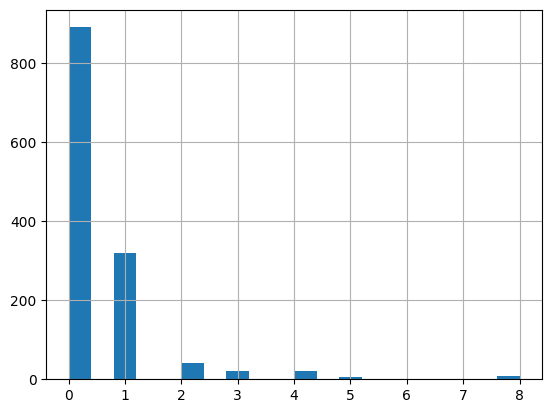

In [7]:
#Check 'sibsp' varible using histogram
data['sibsp'].hist(bins=20)

<Axes: >

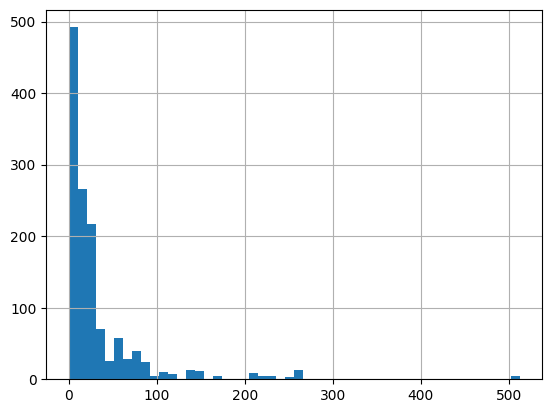

In [8]:
#Check 'fare' variable
data['fare'].hist(bins=50)

Check KDD data

In [9]:
cols=['AGE' ,'NUMCHLD', 'INCOME','WEALTH1','MBCRAFT','MBGARDEN','MBBOOKS','MBCOLECT','MAGFAML' ,'MAGFEM','MAGMALE']
data=pd.read_csv('cup98LRN.txt',usecols=cols)
data.head()

,AGE,NUMCHLD,INCOME,WEALTH1,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE
0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,46.0,1.0,6.0,9.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0
2,NaN,NaN,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,70.0,NaN,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,78.0,1.0,3.0,2.0,1.0,0.0,9.0,0.0,4.0,1.0,0.0


In [10]:
#CHECK MISSING DATA
print(data.shape)
data.isnull().sum()

(6828, 11)


AGE         1642
NUMCHLD     5914
INCOME      1478
WEALTH1     3115
MBCRAFT     3693
MBGARDEN    3693
MBBOOKS     3693
MBCOLECT    3699
MAGFAML     3693
MAGFEM      3693
MAGMALE     3693
dtype: int64

All variables have lot of missing values, 'NUMCHLD' has 80 % of missing values.

In [11]:
data.isnull().mean()

AGE         0.240480
NUMCHLD     0.866139
INCOME      0.216462
WEALTH1     0.456210
MBCRAFT     0.540861
MBGARDEN    0.540861
MBBOOKS     0.540861
MBCOLECT    0.541740
MAGFAML     0.540861
MAGFEM      0.540861
MAGMALE     0.540861
dtype: float64

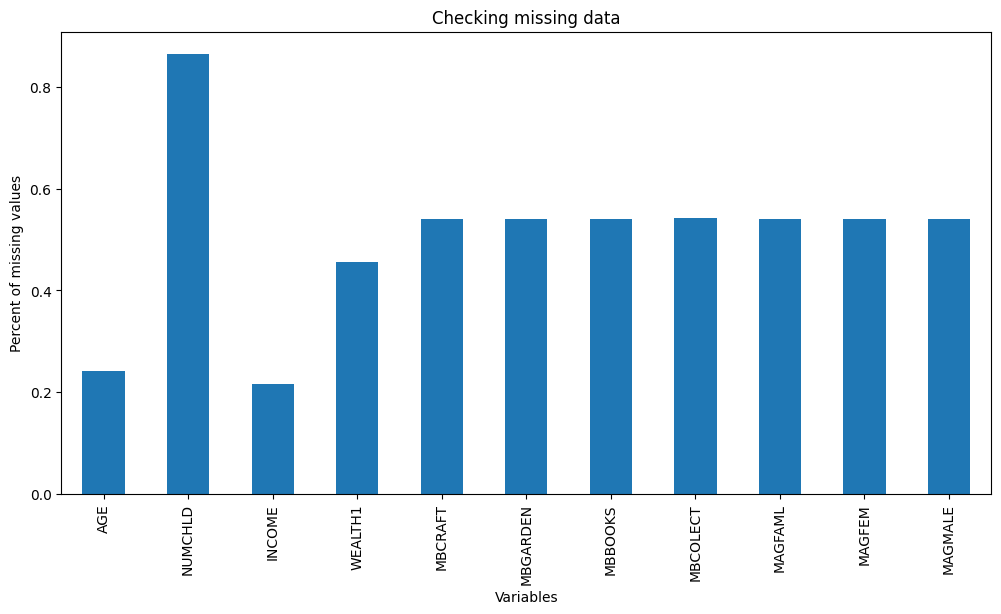

In [12]:
#draw histogram of percent missisng values
data.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percent of missing values')
plt.xlabel('Variables')
plt.title('Checking missing data')
plt.show()

In [13]:
#Check cardinality of categorical data

cols=['GENDER','RFA_2','MDMAUD_A','DOMAIN','RFA_15']
data=pd.read_csv('cup98LRN.txt',usecols=cols)
data=data.replace(' ',np.nan)
data.head()

,DOMAIN,GENDER,RFA_2,RFA_15,MDMAUD_A
0,T2,F,L4E,S4E,X
1,S1,M,L2G,NaN,X
2,R2,M,L4E,S4F,X
3,R2,F,L4E,S4E,X
4,S2,F,L2F,NaN,X


In [14]:
#determine number of unique categories in each variable
data.nunique()

DOMAIN      16
GENDER       5
RFA_2       14
RFA_15      31
MDMAUD_A     4
dtype: int64

In [15]:
#print out unique values of 'GENDER' category
data['GENDER'].unique()

array(['F', 'M', nan, 'C', 'U', 'J'], dtype=object)

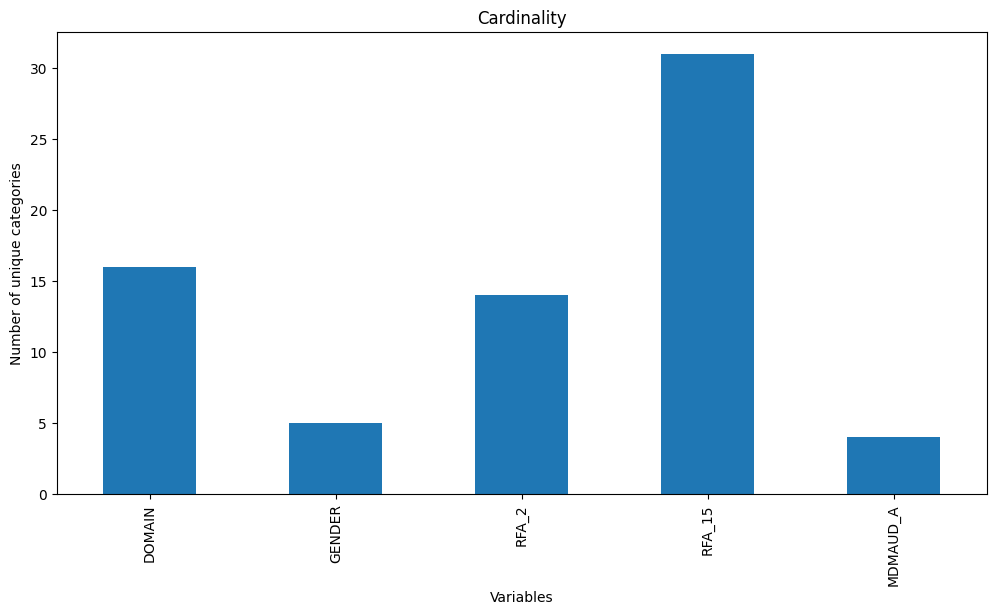

In [16]:
# Make a plot to check cardinality of each variable
data.nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')
plt.show()

In [17]:
#Check the rare categories in catagorical data
#use car data
data=pd.read_csv('car.data',header=None)
data.columns=['buying','maint','doors','persons','lug_boot','safety','class']
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [18]:
#display unique categories of the variable 'class'
data['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

unacc    0.700231
acc      0.222222
good     0.039931
vgood    0.037616
Name: class, dtype: float64


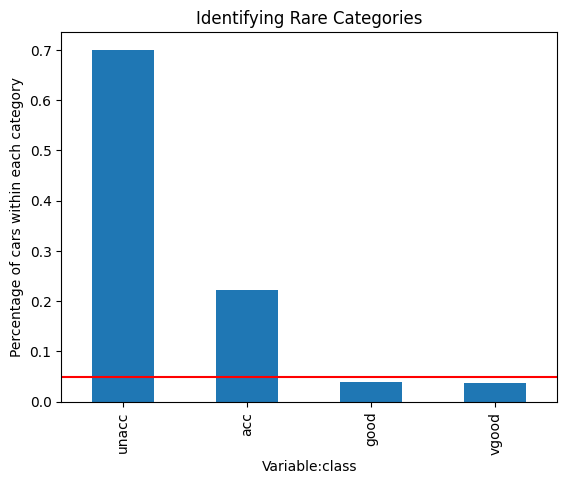

In [19]:
#Check percentage of cars per category
label_freq=data['class'].value_counts()/len(data)
print(label_freq)
fig=label_freq.sort_values(ascending=False).plot.bar()
fig.axhline(y=0.05,color='red')#highlight 5% mark with red line
fig.set_ylabel('Percentage of cars within each category')
fig.set_xlabel('Variable:class')
fig.set_title('Identifying Rare Categories')
plt.show()

Good and very good categories are present in less than 5% of cars as shown under red line.

In [20]:
#check linear relationship
import seaborn as sns
from sklearn.linear_model import LinearRegression
np.random.seed(24)
x=np.random.random(200)

In [21]:
y=x*13+np.random.random(200)*2

#create dataframe with x and y variables
data=pd.DataFrame([x,y]).T
data.columns=['x','y']


Text(0.5, 28.999999999999986, 'Independent variable')

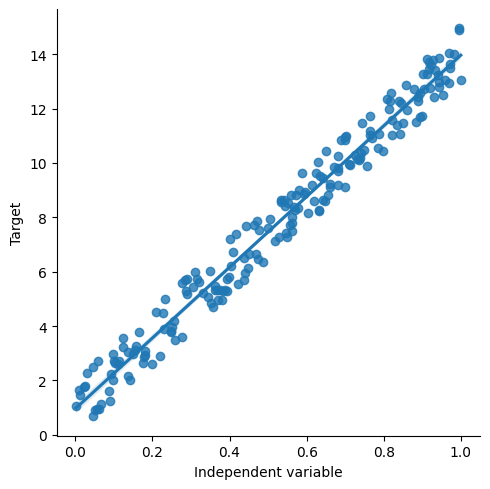

In [22]:
#plot scatter plot to visualize linear relationship
sns.lmplot(x='x',y='y',data=data,order=1)
plt.ylabel('Target')
plt.xlabel('Independent variable')

In [23]:
linreg=LinearRegression()
linreg.fit(data['x'].to_frame(),data['y'])

LinearRegression()

In [24]:
predictions=linreg.predict(data['x'].to_frame())
residuals=data['y']-predictions

Text(0.5, 0, 'Independent variable x')

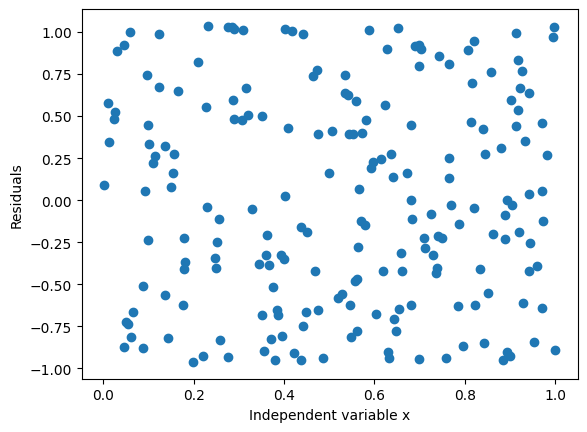

In [25]:
# Maks a scatter plot of independent varibale and residuals
plt.scatter(y=residuals,x=data['x'])
plt.ylabel('Residuals')
plt.xlabel('Independent variable x')


<ipython-input-26-2a301738fa26>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,bins=30)


Text(0.5, 0, 'Residuals')

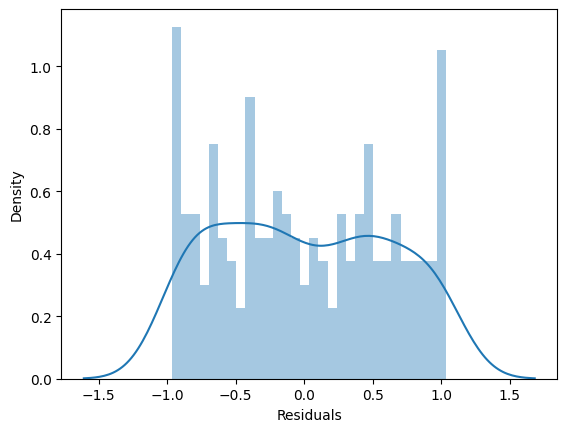

In [26]:
sns.distplot(residuals,bins=30)
plt.xlabel('Residuals')

# Check about normal distribution

<ipython-input-27-d2b50ecb4182>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['x'],bins=30)


<Axes: xlabel='x', ylabel='Density'>

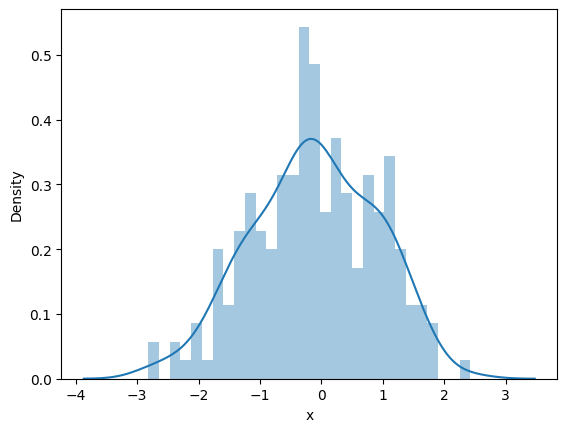

In [27]:
import scipy.stats as stats
x=np.random.randn(200)
data = pd.DataFrame([x]).T
data.columns=['x']
sns.distplot(data['x'],bins=30)


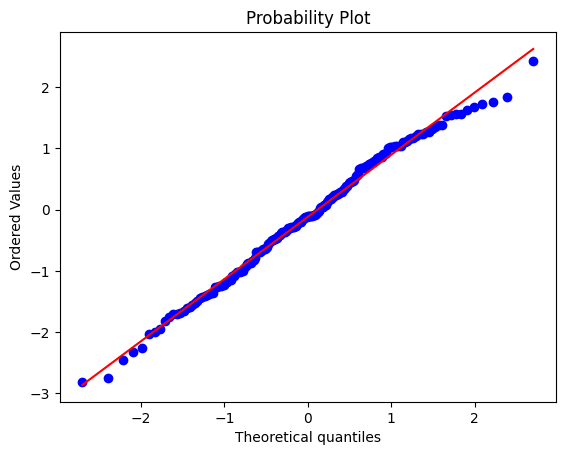

In [28]:
stats.probplot(data['x'],dist='norm',plot=plt)
plt.show()

In [29]:
#Visualize distributions of the variables in a dataset using histograms
from sklearn.datasets import fetch_california_housing
cal_dataset=fetch_california_housing()
cal=pd.DataFrame(cal_dataset.data,columns=cal_dataset.feature_names)

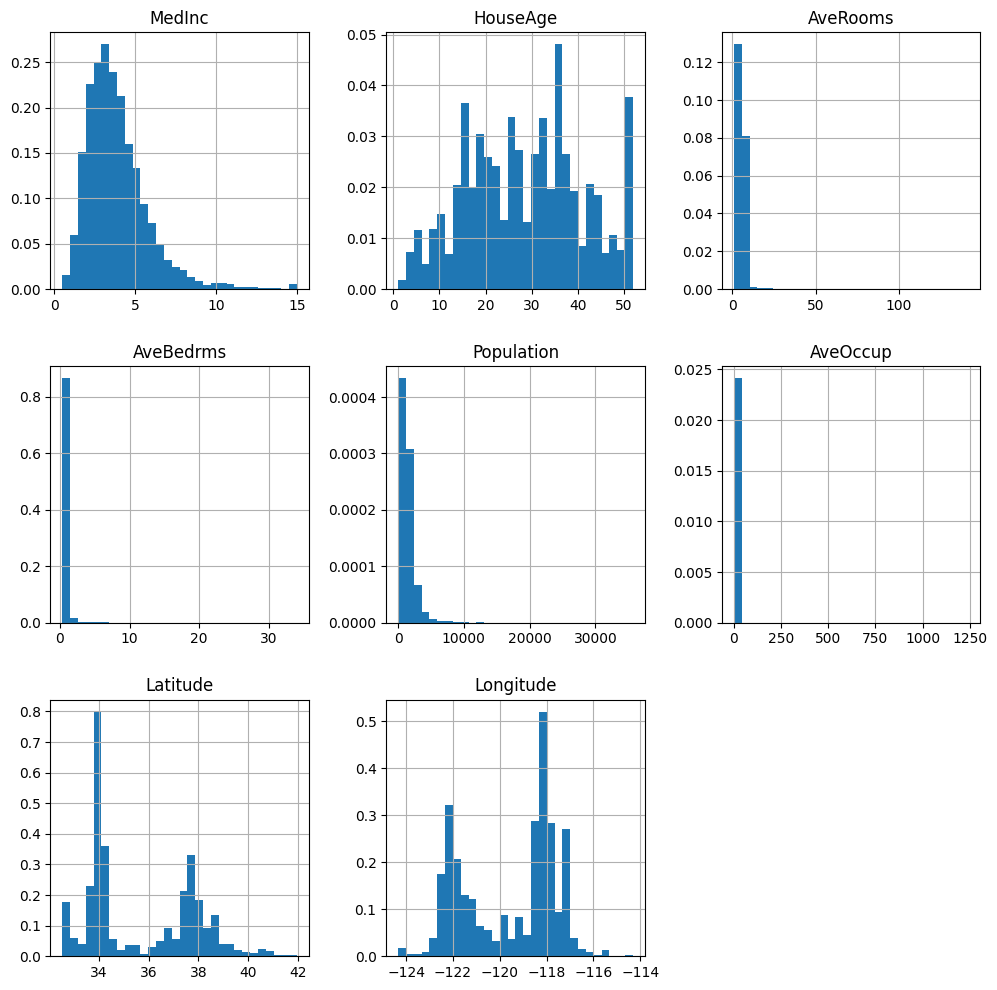

In [30]:
cal.hist(bins=30,figsize=(12,12),density=True)
plt.show()

Missing values imputation techniques

In [31]:
#Credit approval data
import random
data=pd.read_csv('crx.data',header=None)
varnames=['A'+str(s) for s in range(1,17)]
data.columns=varnames

#replace the question mark in the dataset with NaN values
data=data.replace('?',np.nan)

#recast the numerical variables as float data types
data['A2']=data['A2'].astype('float')
data['A14']=data['A14'].astype('float')

In [32]:
#recode the target varibles as binary
data['A16']=data['A16'].map({'+':1,'-':0})

In [33]:
random.seed(42)
values=set([random.randint(0,len(data)) for p in range(0,100)])
for var in ['A3','A8','A9','A10']:
  data.loc[values,var]=np.nan

<ipython-input-33-1cb090d5e723>:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data.loc[values,var]=np.nan
<ipython-input-33-1cb090d5e723>:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data.loc[values,var]=np.nan
<ipython-input-33-1cb090d5e723>:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data.loc[values,var]=np.nan
<ipython-input-33-1cb090d5e723>:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data.loc[values,var]=np.nan


In [34]:
data.to_csv('creditApprovalUCI.csv',index=False)

In [35]:
#Lets calculate percentage of missing values for each variable and sort them in ascending order
data.isnull().mean().sort_values(ascending=True)

A11    0.000000
A12    0.000000
A13    0.000000
A15    0.000000
A16    0.000000
A4     0.008696
A5     0.008696
A6     0.013043
A7     0.013043
A1     0.017391
A2     0.017391
A14    0.018841
A3     0.130435
A8     0.130435
A9     0.130435
A10    0.130435
dtype: float64

In [36]:
#remove observations with missing data in any of the variable
data_cca=data.dropna()

In [37]:
#compare the results
print('Number of total observations: {}'.format(len(data)))
print('Number of observations with complete cases: {}'.format(len(data_cca)))

Number of total observations: 690
Number of observations with complete cases: 565


In [41]:
#Perform mean/median imputation
#Use mean imputation if variables are normally distributed otherwise use median imputations. Mean and median imputations may distort the distribution of the original variables if there is a hig
#percentage of missing data
!pip install feature-engine
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from feature_engine.imputation import MeanMedianImputer




In [42]:
data=pd.read_csv('creditApprovalUCI.csv')
X_train,X_test,y_train,y_test=train_test_split(data.drop('A16',axis=1),data['A16'],test_size=0.3,random_state=0)

In [44]:
print(X_train.shape)
print(X_test.shape)

(483, 15)
(207, 15)


In [45]:
X_train.isnull().mean()

A1     0.008282
A2     0.022774
A3     0.149068
A4     0.008282
A5     0.008282
A6     0.008282
A7     0.008282
A8     0.149068
A9     0.149068
A10    0.149068
A11    0.000000
A12    0.000000
A13    0.000000
A14    0.014493
A15    0.000000
dtype: float64

In [48]:
#replace missing values with median using the train set and then use this value to replace the missing data in train and test sets
for var in ['A2','A3','A8','A11','A15']:
  value=X_train[var].median()
  X_train[var]=X_train[var].fillna(value)
  X_test[var]=X_test[var].fillna(value)


In [51]:
X_train,X_test,y_train,y_test=train_test_split(data[['A2','A3','A8','A11','A15']],data['A16'],test_size=0.3,random_state=0)
imputer=SimpleImputer(strategy='median')
imputer.fit(X_train)
imputer.statistics_

array([28.835,  3.   ,  1.085,  0.   ,  6.   ])

In [52]:
X_train=imputer.transform(X_train)
X_test=imputer.transform(X_test)

In [57]:
#Finally lets compute median imputation tranformer using MeanMedianImputer() from feature engine
X_train,X_test,y_train,y_test=train_test_split(data[['A2','A3','A8','A11','A15']],data['A16'],test_size=0.3,random_state=0)
median_imputer=MeanMedianImputer(imputation_method='median',variables=['A2','A3','A8','A11','A15'])
median_imputer.fit(X_train)
median_imputer.imputer_dict_


{'A2': 28.835, 'A3': 3.0, 'A8': 1.085, 'A11': 0.0, 'A15': 6.0}

In [60]:
X_train=median_imputer.transform(X_train)
X_test=median_imputer.transform(X_test)
X_train.isnull().mean()

A2     0.0
A3     0.0
A8     0.0
A11    0.0
A15    0.0
dtype: float64